<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Team 16 | Survey Data Analysis</h2><br><br>
Machine Learning Course<br>
<strong>Hult International Business School</strong>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Executive Summary</h3>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

The marketing team needs to focus primarily on three clusters of people that cover 55% of the audience. It is necessary to prefer one group of people for the greatest return, covering 19% of respondents.<br><br>

<strong>Who are these people?</strong>

1. 19%. Quite busy people who use the phone as a distraction. They spend much free time there on entertainment, especially music and games. In doing so, they will focus on pretty new trends and will not miss the opportunity to show off their purchases to others.<br>
The introduced mechanisms should also consider the level of audience formation in this group since this can affect the reaction on their part.<br><br>

2. 18%. A group of people who carefully monitor their purchases and plan time for shopping. They are specifically looking for discounts and promotions. If they use the phone, it’s not for entertainment, but most likely to find special groups on Facebook about shopping and hobbies and rarely chat about this.<br>
The analysis showed that the implemented solutions should return regardless of demographic factors and phone model. <br><br>

3. 18%. A group of people, quite possibly old, prefer to spend a lot of their spare time watching TV shows and using slightly outdated platforms. In doing so, they also involve children in this pastime. In addition, they can also spend another part of their free time shopping.<br>
We found that if a customer has a Nokia or Blackberry phone, their response will differ from others in this group.<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part I | Importing Data and Descriptive Statistics</h3><br>
The analysis was based on the survey data, which includes 16 questions, seven of which imply the possibility of multiple answers. The original dataset contains 1,552 observations that do not have missing values.
After examining the descriptive statistics, we concluded that the data does not contain extreme values, therefore, does not require additional initial changes.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [2]:
# Importing packages / libraries

# Essentials
import numpy                    as np                       # mathematical essentials
import pandas                   as pd                       # data science essentials
import matplotlib.pyplot        as plt                      # fundamental data visualization
import seaborn                  as sns                      # enhanced visualization
import sys                                                  # system-specific parameters and functions

# Machine Learning
from sklearn.decomposition      import PCA                  # principal component analysis
from sklearn.cluster            import KMeans               # KMeans
from sklearn.preprocessing      import StandardScaler       # standard scaler
from scipy.cluster.hierarchy    import dendrogram, linkage  # dendrograms

In [3]:
# Importing the dataset
file = "./Mobile_App_Survey_Data.xlsx" # path
survey_df = pd.read_excel(io = file,
                          sheet_name = 0,
                          header = 0)


# Displaying the first 5 rows of the dataset
survey_df.head(n = 5)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,...,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,...,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,...,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,...,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,...,2,1,0,0,0,0,3,2,4,2


In [4]:
# Checking the missing values in the original dataset
print('Missing values:', survey_df.isnull().any().any())

Missing values: False


In [5]:
# Checking the description of features
survey_df.describe().round(decimals = 1)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,...,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
count,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,...,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0
mean,1192.9,4.5,0.5,0.2,0.4,0.2,0.1,0.1,0.0,0.2,...,1.9,0.5,0.2,0.2,0.1,0.2,1.7,1.8,7.8,1.5
std,712.0,2.4,0.5,0.4,0.5,0.4,0.2,0.3,0.2,0.4,...,0.9,0.5,0.4,0.4,0.4,0.4,1.5,0.4,3.7,0.5
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
25%,570.8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,1.0
50%,1144.5,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,7.5,2.0
75%,1833.5,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,11.0,2.0
max,2396.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,14.0,2.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part II | Dividing data into datasets reflecting different scales and metrics</h3><br>

After examining the presented questions and sub-questions, we decided to separate them and combine them into appropriate groups that best reflect their essence, scale, and metric:<br><br>

   - <em>Demographic data.</em> We have combined questions regarding Age (q1), Education (q48), Marital Status (q49), Children (q50 with sub-questions), <br> Race (q54 and q55), Income (q56) and Gender (q57). <br><br>
   
   - <em>Psycho-behavioral data.</em> We have added questions 25 and 26 to this group and all sub-questions reflecting the same concept. These questions are not directly related to technology and reflect the customers' mindset. <br><br>
   
   - <em>Tech-based psychological data.</em> We have added almost all the remaining questions here, except for question 2, which reflects which phone the person is using. We considered that this issue is not psychological and not strictly demographic, so that it will remain isolated until the last stage of the analysis. All questions (q4, q11, q12, q13*, q24) included in this group reflect WHY the buyer uses technology and WHAT thinks about it.<br><br>

*We had doubts about whether question 13 should be related to technology-based or behavioral ones. We found that the extreme option, thanks to which, we would confidently say that this question is behavioral - if many people answered the same to all or most of the questions. Either many applications are used very often, or they are almost never used. Therefore, we found that the mean of this question is closer to Three (Rarely), and the variation is about one question. Only 46 observations, 3%, are characterized by the same answer to all questions, which is not enough to be classified in this category.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [6]:
# Concatenating variables together using dictionary
survey_dict = {
    
# Demographic features
'demographic'  : ['q1',     # Age Groups
                  'q48',    # Level of Education
                  'q49',    # Marital Status
                  'q50r1',  # Children - No Children
                  'q50r2',  # Children - <6 yrs
                  'q50r3',  # Children - 6-12 yrs
                  'q50r4',  # Children - 13-17 yrs
                  'q50r5',  # Children - >18 yrs
                  'q54',    # Race
                  'q55',    # Hispanic / Latino
                  'q56',    # Income
                  'q57'],   # Gender
            
    
# General Psychology features, including Behavioral and Tech-based Questions
'behaviour_gen' : ['q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
                  'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11',       # people's focus of Apps' use

                  'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5',
                  'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10',
                  'q13r11', 'q13r12',                             # people's time spent in Apps 

                  'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 
                  'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10',
                  'q24r11', 'q24r12',                             # behaviour questions (more tech)

                  'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5',
                  'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 
                  'q25r11', 'q25r12',                             # behaviour questions (more psychosocial metric)

                  'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7',
                  'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                  'q26r12', 'q26r13', 'q26r14', 'q26r15', 
                  'q26r16', 'q26r17', 'q26r18'],                  # behaviour questions (more psychosocial metric)
    
    
# Tech-based questions    
'tech_based'   : ['q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
                  'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11',       # people's focus of Apps' use
                  
                  'q11',                                          # quantity of Apps installed on the smartphone
                  
                  'q12',                                          # percentage of free-downloaded apps
                  
                  'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5',
                  'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10',
                  'q13r11', 'q13r12',                             # time spent in Apps 

                  'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 
                  'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10',
                  'q24r11', 'q24r12'],                            # behaviour questions, directly related to tech
    
    
# Behaviour questions, not directly related to tech and Apps
'behav_based'  : ['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5',
                  'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 
                  'q25r11', 'q25r12',                             

                  'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7',
                  'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                  'q26r12', 'q26r13', 'q26r14', 'q26r15', 
                  'q26r16', 'q26r17', 'q26r18']}                  
            

    
# Creating DataFrame with demographic features only
survey_dem = pd.DataFrame(survey_df.loc[:, survey_dict['demographic']])


# Creating DataFrame with general behavioral questions
survey_beh_gen = pd.DataFrame(survey_df.loc[:, survey_dict['behaviour_gen']])


# Creating Main DataFrame with tech-based questions
survey_tech = pd.DataFrame(survey_df.loc[:, survey_dict['tech_based']])


# Creating Other Main DataFrame with more behavioural questions
survey_beh = pd.DataFrame(survey_df.loc[:, survey_dict['behav_based']])

In [7]:
# Checking DataFrame with subquestions of question 13
q13 = pd.DataFrame(survey_df.loc[:, ['q13r1', 'q13r2', 'q13r3', 'q13r4', 
                                     'q13r5', 'q13r6', 'q13r7', 'q13r8', 
                                     'q13r9', 'q13r10', 'q13r11', 'q13r12']])


# Calculating the Variance and Mean across customers (rows) of q13
q13_var = np.var(q13.T)     # variance
q13_mean = np.mean(q13.T)   # mean 


# Average score of calculations above
q13_var_avg = np.mean(q13_var)   # variance
q13_mean_avg = np.mean(q13_mean) # mean  


# Displaying the variance and mean of q13 subquestions
print('Average Mean across customers:      ', round(q13_mean_avg, 2),
      '\nAverage Variance across customers:  ', round(q13_var_avg, 2))

Average Mean across customers:       2.71 
Average Variance across customers:   1.17


In [8]:
# Source: Professor Chase Kusterer's materials 

# definition of scree_plot ---------------------------------------------------
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    """
    # Building a scree plot

    # Setting plot size
    fig, ax  = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # Developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth       =  2,
             marker          = 'o',
             markersize      =  10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # Setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
        
    # Displaying the plot
    plt.show()


# definition of unsupervised_scaler ------------------------------------------

def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """
    # Building an auto scaler
    
    # Instantiating a StandardScaler()
    scaler = StandardScaler()


    # Transforming data after fit across rows / customers
    x_scaled_rows = scaler.fit_transform(df.T).T
    
    
    # Transforming data after fit across columns / questions
    x_scaled = scaler.fit_transform(x_scaled_rows)

    
    # Converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # Reattaching column names
    new_df.columns = df.columns
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part III | Principal Component Analysis (PCA) of Tech-based data</h3><br>
First of all, we have standardized the data:<br>
- firstly, across customers: since different people can evaluate Likert scales differently,<br>
- secondly, by questions: to bring the data to a form suitable for PC analysis. <br><br>
We have constructed a Scree Plot and evaluated the principal components' influence on explaining the variation in the data. Accordingly, the first three components describe 36% of the data variation. However, 20 components are needed to achieve an 80% explanation of data variation, most of which explain the variation in no more than 2-3%. Therefore, we decided in favor of quality over quantity, choosing only those factors that explain at least 5% of the variation in responses of tech-based questions. Thus, we have selected four components that we explore below.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [9]:
# Scaling variables

# Applying the unsupervised_scaler function
survey_tech_scaled = unsupervised_scaler(df = survey_tech) # tech-based questions

In [10]:
# Instantiating a PCA object with no limit to principal components for Tech-based Questions
pca = PCA(n_components = None,
            random_state = 219)


# Fit_transforming with scaled tech-based data 
survey_tech_pca = pca.fit_transform(survey_tech_scaled)

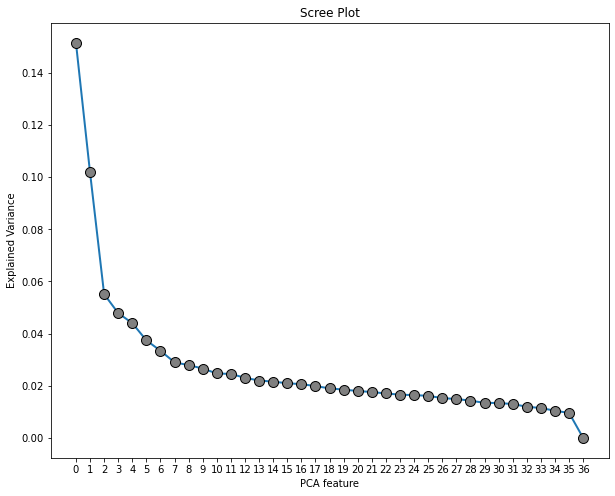

In [11]:
# Calling the scree_plot function for tech-based questions
scree_plot(pca_object = pca)

In [12]:
# Component number counter
component_number    = 0
cumulative_variance = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number    += 1
    cumulative_variance += variance
    print(f"""
PC:                  {component_number}
Percentage Variance: {variance.round(3)}
Cumulative Variance: {cumulative_variance.round(3)}""") 


PC:                  1
Percentage Variance: 0.152
Cumulative Variance: 0.152

PC:                  2
Percentage Variance: 0.102
Cumulative Variance: 0.253

PC:                  3
Percentage Variance: 0.055
Cumulative Variance: 0.308

PC:                  4
Percentage Variance: 0.048
Cumulative Variance: 0.356

PC:                  5
Percentage Variance: 0.044
Cumulative Variance: 0.4

PC:                  6
Percentage Variance: 0.037
Cumulative Variance: 0.438

PC:                  7
Percentage Variance: 0.033
Cumulative Variance: 0.471

PC:                  8
Percentage Variance: 0.029
Cumulative Variance: 0.5

PC:                  9
Percentage Variance: 0.028
Cumulative Variance: 0.528

PC:                  10
Percentage Variance: 0.027
Cumulative Variance: 0.555

PC:                  11
Percentage Variance: 0.025
Cumulative Variance: 0.58

PC:                  12
Percentage Variance: 0.025
Cumulative Variance: 0.604

PC:                  13
Percentage Variance: 0.023
Cumulative Var

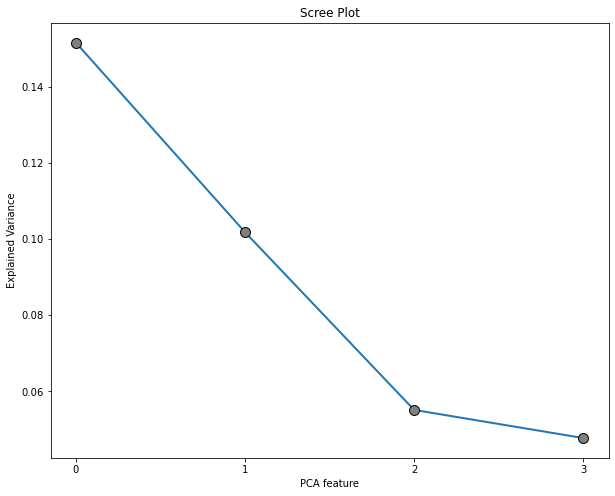

In [13]:
# Limitation with chosen number of components for analysis

# Instantiating a new model using the first four PC
pca_4 = PCA(n_components = 4,
            random_state = 219)


# Fit_transforming with survey_tech_scaled
tech_4 = pca_4.fit_transform(survey_tech_scaled)

# Calling the scree_plot function
scree_plot(pca_object = pca_4)

In [14]:
# Transposing PCA components - tech-based questions
factor_loadings_df_tech = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# Naming rows as original features
factor_loadings_df_tech = factor_loadings_df_tech.set_index(survey_tech_scaled.columns)


# Saving to Excel accordingly
factor_loadings_df_tech.to_excel('tech_factor_loadings.xlsx')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
Thus, we identified the strongest correlation, from 23%, between the components and the presented questions, based on which we suggested how we can interpret the principal components in the best possible way:<br><br>


 - <strong>First Principal Component.</strong> 15.2% of variance explanation. This component is related to such questions as - do you use specific applications (Music, Gaming, Social Networking, Shopping) and questions with consent or disagreement about the role of music in life and communication with family/friends.<br>
 
<em>Positive Affinity:</em>  Someone who doesn't use their phone for fun.<br>
<em>Negative Affinity:</em> Accordingly, the one who uses the phone mainly for listening to music, chatting, and shopping.<br><br>


 - <strong>Second Principal Component.</strong> 10.2% of variance explanation. This component mainly reflects questions describing the frequency of using specific applications (MySpace, Vevo, Last FM, AOL Radio) and the fact of watching TV shows.<br>

<em>Positive Affinity:</em>  Someone old enough to use less modern platforms for entertainment and have time to watch TV shows. <br>
<em>Negative Affinity:</em> Someone who does not use legacy apps due to their age and/or because they have more modern operating systems and app stores.<br><br>


 - <strong>Third Principal Component:</strong> 5.5% of variance explanation. This component mainly describes the relationship between questions regarding agreement or disagreement with statements about the role of technology and information in life. It also reflects the question of the share of free installed applications.<br>
 
<em>Positive Affinity:</em>  Someone following technology changes and worried about its growing influence, preferring free apps.<br>
<em>Negative Affinity: </em> Someone who prefers to pay for applications and is not worried about the threat of the excessive role of technology and information in life.<br><br>


 - <strong>Forth Principal Component:</strong> 4.8% of variance explanation. This component deals with questions about agreeing or disagreeing about communicating with friends/family and describing applications and ways of communicating.<br>
 
<em>Positive Affinity:</em>  Someone who believes that the Internet helps communicate remotely but does not prefer to use modern instant messengers like FB.<br>
<em>Negative Affinity:</em> Someone who uses Facebook actively and prefers instant messengers but has a small social circle.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [15]:
# Analyzing output of the PCA 
tech_1st_component = factor_loadings_df_tech.iloc[:, 0]\
                     [abs(factor_loadings_df_tech.iloc[:, 0]) >= 0.23]  # first component

tech_2nd_component = factor_loadings_df_tech.iloc[:, 1]\
                     [abs(factor_loadings_df_tech.iloc[:, 1]) >= 0.23]  # second component

tech_3rd_component = factor_loadings_df_tech.iloc[:, 2]\
                     [abs(factor_loadings_df_tech.iloc[:, 2]) >= 0.23]  # third component

tech_4th_component = factor_loadings_df_tech.iloc[:, 3]\
                     [abs(factor_loadings_df_tech.iloc[:, 3]) >= 0.23]  # forth component


# Displaying the result with significant correlation (>= 23%) between pc and questions
print(f"""
Tech-Based Questions
---------------------------
> 1st Component        
Explained Variance = 15.2%             
{tech_1st_component.to_string()}

> 2nd Component
Explained Variance = 10.2%
{tech_2nd_component.to_string()}

> 3rd Component
Explained Variance = 5.5%
{tech_3rd_component.to_string()}

> 4th Component
Explained Variance = 4.8%
{tech_4th_component.to_string()}
""")   


Tech-Based Questions
---------------------------
> 1st Component        
Explained Variance = 15.2%             
q4r1     -0.23
q4r5     -0.23
q4r6     -0.28
q4r8     -0.23
q24r7     0.23
q24r10    0.24
q24r12    0.24

> 2nd Component
Explained Variance = 10.2%
q4r4     0.23
q13r3   -0.26
q13r5   -0.27
q13r7   -0.28
q13r8   -0.28

> 3rd Component
Explained Variance = 5.5%
q12      0.25
q24r1   -0.39
q24r4   -0.46
q24r9   -0.45

> 4th Component
Explained Variance = 4.8%
q4r6     -0.32
q13r1     0.55
q24r3     0.46
q24r11   -0.24
q24r12   -0.23



In [16]:
# Transposing PCA components (pc = 4)
tech_loadings = pd.DataFrame(np.transpose(pca_4.components_))


# Naming rows as original features
tech_loadings = tech_loadings.set_index(survey_tech_scaled.columns)

# Naming each principal component
tech_loadings.columns = ['No Fun',                  # not using phone for shopping, music and gaming (for entertainment)
                         'Old School',              # prefers ancient apps and tv shows
                         'Concerned Tech Follower', # follows technology with a lot of concern
                         'Ancient Messenger']       # old-approach of chating (email, skype smth like that)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part IV | Principal Component Analysis (PCA) of Behavioral data</h3><br>
We built a Scree Plot with behavioral data scalled and found that the first six components best describe the variation in the data — by at least 4.5% each. The first six components, taken together, can represent 38% of the data variance, which is the best choice for us, given that 19 out of 28 components describe only 80% of the data.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [17]:
# Scaling variables

# Applying the unsupervised_scaler function
survey_beh_scaled = unsupervised_scaler(df = survey_beh)   # behavioral questions

In [18]:
# Instantiting a PCA object with no limit to principal components for behavioral questions
pca_1 = PCA(n_components = None,
            random_state = 219)


# Fit_transforming with scaled behavioral data 
survey_beh_pca = pca_1.fit_transform(survey_beh_scaled)

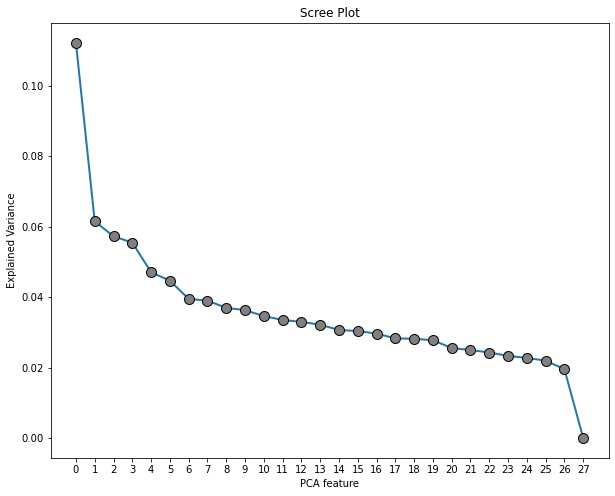

In [19]:
# Calling the scree_plot function with behavioral questions
scree_plot(pca_object = pca_1)

In [20]:
# Component number counter
component_number    = 0
cumulative_variance = 0


# looping over each principal component
for variance in pca_1.explained_variance_ratio_:
    component_number    += 1
    cumulative_variance += variance
    print(f"""
PC:                  {component_number}
Percentage Variance: {variance.round(3)}
Cumulative Variance: {cumulative_variance.round(3)}""") 


PC:                  1
Percentage Variance: 0.112
Cumulative Variance: 0.112

PC:                  2
Percentage Variance: 0.062
Cumulative Variance: 0.174

PC:                  3
Percentage Variance: 0.057
Cumulative Variance: 0.231

PC:                  4
Percentage Variance: 0.055
Cumulative Variance: 0.286

PC:                  5
Percentage Variance: 0.047
Cumulative Variance: 0.333

PC:                  6
Percentage Variance: 0.045
Cumulative Variance: 0.378

PC:                  7
Percentage Variance: 0.039
Cumulative Variance: 0.418

PC:                  8
Percentage Variance: 0.039
Cumulative Variance: 0.456

PC:                  9
Percentage Variance: 0.037
Cumulative Variance: 0.493

PC:                  10
Percentage Variance: 0.036
Cumulative Variance: 0.53

PC:                  11
Percentage Variance: 0.035
Cumulative Variance: 0.564

PC:                  12
Percentage Variance: 0.034
Cumulative Variance: 0.598

PC:                  13
Percentage Variance: 0.033
Cumulative

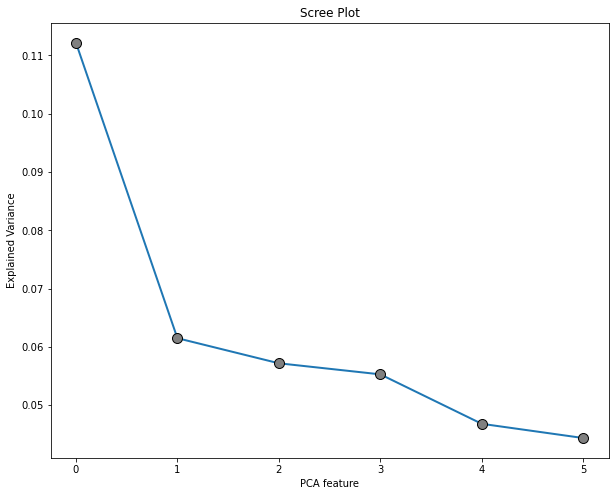

In [21]:
# INSTANTIATING a new model using the first three principal components
pca_6 = PCA(n_components = 6,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
beh_6 = pca_6.fit_transform(survey_beh_scaled)

# >>> Delete after for removing the noise in the code translation:

# calling the scree_plot function
scree_plot(pca_object = pca_6)

In [22]:
# Transposing PCA components - behavioral questions
factor_loadings_df_beh = pd.DataFrame(np.transpose(pca_1.components_.round(decimals = 2)))


# Naming rows as original features
factor_loadings_df_beh = factor_loadings_df_beh.set_index(survey_beh_scaled.columns)


# Saving to Excel accordingly
factor_loadings_df_beh.to_excel('beh_factor_loadings.xlsx')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
Thus, we identified the most related questions and components with a correlation greater than 23%, which are explained below:<br><br>


 - <strong>First PC.</strong> 11.2% of variance explanation. This component is mainly associated with questions describing a person's position in society - leadership, advice asking, optimism, etc. <br>
 
<em>Positive Affinity:</em> Introvert.<br>
<em>Negative Affinity:</em> Extrovert.<br><br>


 - <strong>Second PC.</strong> 6.2% of variance explanation. This component is related to spending behavior, time management, and interaction with children.<br>
 
<em>Positive Affinity:</em> Someone, most likely a parent, who is thrifty and careful about shopping.<br>
<em>Negative Affinity:</em> Someone who prefers to buy expensive items that reflect their style when they need it, i.e., those who most likely do not follow the sales and do not plan to buy at this time.<br><br>


 - <strong>Third PC.</strong> 5.7% of variance explanation. This component is primarily associated with ad hoc purchases and discounts and the tendency to show purchases to others.<br>
 
<em>Positive Affinity:</em> Someone who carefully monitors all the promotions, tries to save money, and does not show purchases to others.<br>
<em>Negative Affinity:</em> Someone who likes to hype, buy newly released products, and show them to others.<br><br>


 - <strong>Forth PC.</strong> 5.5% of variance explanation. This component is mainly associated with questions describing the presence of responsibility and sense of style in conjunction with the tendency to save. <br>

<em>Positive Affinity:</em> Someone who is not mainly responsible, capable of impulsive purchases that do not reflect his style.<br>
<em>Negative Affinity:</em> Someone very meticulous about shopping, looking for the most suitable products at reasonable prices.<br><br>


 - <strong>Fifth PC.</strong> 4.7% of variance explanation. This component addresses a small number of issues related to phone use for person/children/family. <br>
 
<em>Positive Affinity:</em> Someone who makes impulsive purchases for themselves that do not also imply in-house purchases.<br>
<em>Negative Affinity:</em> Someone who tries to use the phone to distract the child and is willing to spend money for that.<br><br>


 - <strong>Sixth PC.</strong> 4.5% of variance explanation. This component mainly describes issues related to employment and the purpose of using the phone.<br>
 
<em>Positive Affinity:</em> Someone very busy who uses the phone as a distraction.<br>
<em>Negative Affinity:</em> Someone who uses the phone mainly for a large number of purchases, including impulsive, and has time to do so.<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [23]:
beh_1st_component = factor_loadings_df_beh.iloc[:, 0]\
                    [abs(factor_loadings_df_beh.iloc[:, 0]) >= 0.23]

# Analyzing output of the PCA - behavioral questions
beh_1st_component = factor_loadings_df_beh.iloc[:, 0]\
                    [abs(factor_loadings_df_beh.iloc[:, 0]) >= 0.23]  # first component

beh_2nd_component = factor_loadings_df_beh.iloc[:, 1]\
                    [abs(factor_loadings_df_beh.iloc[:, 1]) >= 0.23]  # second component

beh_3rd_component = factor_loadings_df_beh.iloc[:, 2]\
                    [abs(factor_loadings_df_beh.iloc[:, 2]) >= 0.23]  # third component

beh_4th_component = factor_loadings_df_beh.iloc[:, 3]\
                    [abs(factor_loadings_df_beh.iloc[:, 3]) >= 0.23]  # forth component

beh_5th_component = factor_loadings_df_beh.iloc[:, 4]\
                    [abs(factor_loadings_df_beh.iloc[:, 4]) >= 0.23]  # fifth component

beh_6th_component = factor_loadings_df_beh.iloc[:, 5]\
                    [abs(factor_loadings_df_beh.iloc[:, 5]) >= 0.23]  # sixth component


# Displaying the result with significant correlation (>= 23%) between pc and questions
print(f"""
Behavioral Questions
---------------------------
> 1st Component        
Explained Variance = 11.2%             
{beh_1st_component.to_string()}

> 2nd Component
Explained Variance = 6.2%
{beh_2nd_component.to_string()}

> 3rd Component
Explained Variance = 5.7%
{beh_3rd_component.to_string()}

> 4th Component
Explained Variance = 5.5%
{beh_4th_component.to_string()}

> 5th Component
Explained Variance = 4.7%
{beh_5th_component.to_string()}

> 6th Component
Explained Variance = 4.5%
{beh_6th_component.to_string()}
""")   


Behavioral Questions
---------------------------
> 1st Component        
Explained Variance = 11.2%             
q25r1     0.28
q25r2     0.23
q25r3     0.24
q25r4     0.31
q25r7     0.26
q25r9     0.25
q25r10    0.23
q25r11    0.28

> 2nd Component
Explained Variance = 6.2%
q25r6    -0.34
q25r12   -0.25
q26r5    -0.27
q26r7     0.47
q26r11   -0.25
q26r15    0.26
q26r18    0.46

> 3rd Component
Explained Variance = 5.7%
q25r5     0.29
q25r12   -0.28
q26r3    -0.25
q26r4    -0.23
q26r8     0.42
q26r10    0.47
q26r12    0.35

> 4th Component
Explained Variance = 5.5%
q25r6    -0.35
q26r3     0.46
q26r9     0.27
q26r15    0.35
q26r17    0.27

> 5th Component
Explained Variance = 4.7%
q25r2    -0.28
q25r10    0.34
q25r11    0.34
q26r11    0.52
q26r12    0.33
q26r16   -0.27

> 6th Component
Explained Variance = 4.5%
q25r12   -0.27
q26r4     0.30
q26r6     0.56
q26r9    -0.25
q26r13    0.27
q26r16    0.28
q26r17   -0.31



In [24]:
# Transposing pca components (pc = 6)
beh_loadings = pd.DataFrame(np.transpose(pca_6.components_))


# Naming rows as original features
beh_loadings = beh_loadings.set_index(survey_beh_scaled.columns)


# Naming each principal component
beh_loadings.columns = ['Introvert',                  # Introvert / Preference to be alone
                        'Responsible Parents',        # Parents who control their spendings 
                        'Careful Buyer',              # Careful with purchases
                        'Spontaneous wo Taste',       # Irresponsible rich (maybe) person without good taste
                        'Capital App',                # Prefers to buy many apps, but no in-app purchases
                        'Busy Professional']          # Professional using phone for distraction

In [29]:
# Analyzing tech factor strengths per customer
tech_loadings_obs = pca_4.transform(survey_tech_scaled) # tech
beh_loadings_obs = pca_6.transform(survey_beh_scaled)   # behavior


# Converting to a DataFrame
tech_loadings_df = pd.DataFrame(tech_loadings_obs)      # tech
beh_loadings_df = pd.DataFrame(beh_loadings_obs)        # behavior


# Renaming columns
tech_loadings_df.columns = tech_loadings.columns        # tech
beh_loadings_df.columns = beh_loadings.columns          # behavior


# Concatenation of tech and behavioral questions
loadings = pd.concat([tech_loadings_df,
                      beh_loadings_df],
                      axis = 1)

# Checking the results
loadings.head(n = 2).round(decimals = 2)

,No Fun,Old School,Concerned Tech Follower,Ancient Messenger,Introvert,Responsible Parents,Careful Buyer,Spontaneous wo Taste,Capital App,Busy Professional
0,4.18,-1.34,-1.54,-0.28,2.33,1.64,1.05,-2.78,-0.32,2.02
1,1.04,1.20,3.31,2.04,0.94,0.35,0.64,3.88,-1.49,-0.32


In [26]:
# Applying the unsupervised_scaler function for dataset with pc and observations
loadings_scaled = unsupervised_scaler(df = loadings)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part V | Clustering and People's Preferences</h3><br>
We conducted a cluster analysis and found that the most optimal number of groups for study, taking into account the identified principal components and significance for management decisions (> 10%), is six. Based on the results of correlating the identified groups with the principal components, we identified the most robust preferences of people:<br><br>

 - <em> 1 cluster.</em> 15% of respondents. A group of people mainly follow technological development but are worried about its growing role in people's lives. In addition to this, they are mostly introverts. <br><br>

 - <em> 2 cluster.</em> 18% of respondents. A group of people who carefully monitor their purchases and plan time for shopping. They are specifically looking for discounts and promotions. If they use the phone, it’s not for entertainment, but most likely to find special groups on Facebook about shopping and hobbies and occasionally chat about this.<br><br>

 - <em> 3 cluster.</em> 16% of respondents. Very extroverted people looking for communication everywhere, both offline and online. At the same time, they do not use modern messengers, such as Facebook, preferring other communication channels.<br><br>

 - <em> 4 cluster.</em> 18% of respondents. A group of people, quite possibly old, prefer to spend a lot of their spare time watching TV shows and using slightly outdated platforms. In doing so, they also involve children in this pastime. In addition, they can also spend another part of their free time shopping.<br><br>
 
 - <em> 5 cluster.</em> 14% of respondents. A group of people who prefer to buy expensive branded items that suit their style. They are willing to take the time to find the right things for themselves. They are not prepared to plan their shopping time, for example, during sales periods, but they will be glad to find discounts and promotions quickly. If they bought an item, they would not spend more on it because they spent much time on it.<br><br>
 
 - <em> 6 cluster.</em> 19% of respondents. Quite busy people who use the phone as a distraction. They spend much free time there on entertainment, especially music and games. In doing so, they will focus on pretty new trends and will not miss the opportunity to show off their purchases to others. <br><br>
 
Thus, actions aimed at people from clusters 2, 4, and 6. In total, they cover 55% of the audience, but the most preferable are people from the sixth cluster, accounting for 19% of respondents.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

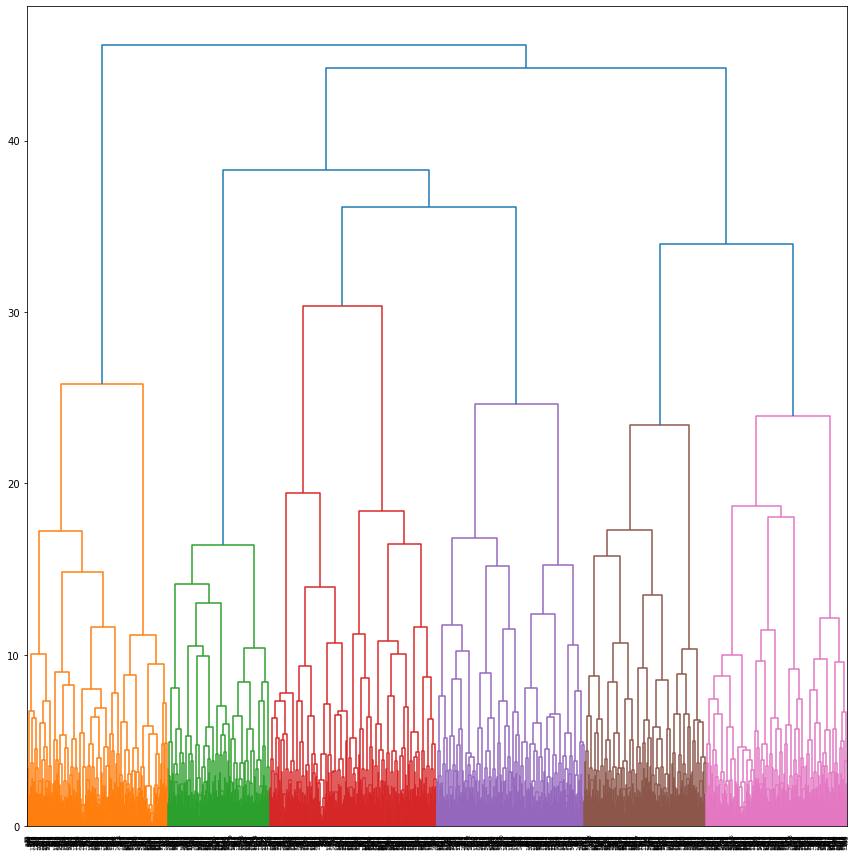

In [198]:
# # Grouping data based on Ward distance
# standard_mergings_ward = linkage(y = loadings_scaled,
#                                  method = 'ward',
#                                  optimal_ordering = True)


# # Setting plot size
# fig, ax = plt.subplots(figsize=(12, 12))


# # Developing a dendrogram
# dendrogram(Z = standard_mergings_ward,
#            leaf_rotation = 90,
#            leaf_font_size = 6)


# # Rendering the plot
# plt.tight_layout()
# plt.show()

In [26]:
# Instantiating a k-Means object with six clusters
customers_k_pca = KMeans(n_clusters   = 6,
                        random_state = 219)


# Fitting the object to the data
customers_k_pca.fit(loadings_scaled)


# Converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# Checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts().to_string())

5    295
3    283
1    272
2    254
0    233
4    215


In [27]:
# Storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# Converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# Renaming principal components
centroids_pca_df.columns = ['No Fun', 'Old School', 'Concerned Tech Follower', 
                            'Ancient Messenger',        # tech components
                            
                            'Introvert', 'Responsible Parents', 'Careful Buyer',
                            'Spontaneous wo Taste', 'Capital App', 
                            'Busy Professional']        # behavioral components

# Displaying results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,No Fun,Old School,Concerned Tech Follower,Ancient Messenger,Introvert,Responsible Parents,Careful Buyer,Spontaneous wo Taste,Capital App,Busy Professional
0,-0.54,-0.58,1.43,0.01,0.63,0.05,-0.31,-0.18,-0.04,-0.28
1,0.80,-0.47,-0.10,-0.80,-0.39,0.74,0.86,-0.56,-0.30,-0.05
2,0.47,-0.45,-0.16,1.20,-0.96,-0.11,-0.07,0.51,-0.32,-0.06
3,0.33,1.25,-0.36,-0.47,0.50,-0.30,-0.59,0.41,-0.64,-0.63
4,-0.11,-0.39,-0.08,-0.20,0.22,-1.06,0.92,0.01,0.86,-0.02
5,-0.96,0.36,-0.50,0.30,0.05,0.44,-0.60,-0.18,0.56,0.94


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Part VI | Refine customer focus based on demographics</h3><br>
We analyzed to identify the presence of characteristics in people when implementing recommendations, depending on demographic data and the phone model. We came to several conclusions:<br><br>

 - For <em>cluster 1</em>, it is necessary to make additions regarding the marital status: more lonely people, even with a partner but not married, will react differently, unlike divorced or widowed.<br><br>
 
 - For <em>cluster 4</em>, it is necessary to consider that Blackberry and Nokia users may behave differently and demonstrate a sharper response to the proposed recommendations.<br><br>
 
 - For <em>cluster 5</em>, it is necessary to consider the race, perhaps the region for the target, and what kind of phone they use - Windows Phone or Nokia.<br><br>
 
 - For <em>cluster 6</em>, education plays an important role. Depending on this, buyers will be more inclined or less inclined to perceive the offered services and goods.
 <hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [28]:
# Concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          loadings],
                          axis = 1)


# Concatenation of demographic data and Q2 (what type of smartphone) with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[:, survey_dict['demographic']],
                                survey_df.loc[:, ['q2r1', 'q2r2', 'q2r3', 'q2r4',
                                              'q2r5', 'q2r6', 'q2r7', 'q2r8',
                                              'q2r9', 'q2r10']],
                                clst_pca_df.round(decimals = 2)],
                                axis = 1)


# Renaming columns
final_pca_clust_df.columns = [ 'Age', 'Education', 'Marital Status', 
                              'Children_Non', 'Children_less6', 'Children_6-12',
                              'Children_13-17', 'Children_over18', 
                              'Race', 'Latino', 'Income', 'Gender', # demographic data
                              
                              'iPhone', 'iPod', 'Android', 'Blackberry',
                              'Nokia', 'Windows Phone', 'HP', 'Tablet',
                              'Other Smartphone', 'No Smartphone',  # Q2
                              
                              'Cluster',                            # cluster
                              
                              'No Fun', 'Old School', 'Concerned Tech Follower', 
                              'Ancient Messenger',                  # tech components
                            
                              'Introvert', 'Responsible Parents', 'Careful Buyer',
                              'Spontaneous wo Taste', 'Capital App', 
                              'Busy Professional']                  # behavioral components

In [29]:
# Renaming Age
age_names = {1 : 'Under 18 yrs',
             2 : '18-24 yrs',
             3 : '25-29 yrs',
             4 : '30-34 yrs',
             5 : '35-39 yrs',
             6 : '40-44 yrs',
             7 : '45-49 yrs',
             8 : '50-54 yrs',
             9 : '55-59 yrs',
             10: '60-64 yrs',
             11: 'Over 65 yrs'}

 # Replacing numbers with categorical data
final_pca_clust_df['Age'].replace(age_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Education
education_names = {1 : 'Some high school',
                   2 : 'High school graduate',
                   3 : 'Some college',
                   4 : 'College graduate',
                   5 : 'Some post-graduate studies',
                   6 : 'Post graduate degree'}

 # Replacing numbers with categorical data
final_pca_clust_df['Education'].replace(education_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Marital Status
marital_names = {1 : 'Married',
                 2 : 'Single',
                 3 : 'Single with a partner',
                 4 : 'Separated/Widowed/Divorced'}

 # Replacing numbers with categorical data
final_pca_clust_df['Marital Status'].replace(marital_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Race
race_names = {1 : 'White / Caucasian',
              2 : 'Black / African American',
              3 : 'Asian',
              4 : 'Native Hawaiian / Pacific Islander',
              5 : 'American Indian / Alaska Native',
              6 : 'Other Race'}

 # Replacing numbers with categorical data
final_pca_clust_df['Race'].replace(race_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Latino
latino_names = {1 : 'Yes',
              2 : 'No'}

 # Replacing numbers with categorical data
final_pca_clust_df['Latino'].replace(latino_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Income
income_names = {1 : 'Under 10,000',
                2 : '10,000-14,999',
                3 : '15,000-19,999',
                4 : '20,000-29,999',
                5 : '30,000-39,999',
                6 : '40,000-49,999',
                7 : '50,000-59,999',
                8 : '60,000-69,999',
                9 : '70,000-79,999',
                10: '80,000-89,999',
                11: '90,000-99,999',
                12: '100,000-124,999',
                13: '125,000-149,999',
                14: 'Over 150,000'}

 # Replacing numbers with categorical data
final_pca_clust_df['Income'].replace(income_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Gender
gender_names = {1 : 'Male',
                2 : 'Female'}

 # Replacing numbers with categorical data
final_pca_clust_df['Gender'].replace(gender_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Children_Non 
children_non_names = {0 : 'No',
                      1 : 'Yes'}

# Renaming Children_less6 
children_less6_names = {0 : 'No',
                        1 : 'Yes'}

# Renaming Children_6-12 
children_6_12_names = {0 : 'No',
                       1 : 'Yes'}

# Renaming Children_13-17 
children_13_17_names = {0 : 'No',
                        1 : 'Yes'}

# Renaming Children_over18
children_over18_names = {0 : 'No',
                         1 : 'Yes'}

 # Replacing numbers with categorical data
final_pca_clust_df['Children_Non'].replace(children_non_names, inplace = True)
final_pca_clust_df['Children_less6'].replace(children_less6_names, inplace = True)
final_pca_clust_df['Children_6-12'].replace(children_6_12_names, inplace = True)
final_pca_clust_df['Children_13-17'].replace(children_13_17_names, inplace = True)
final_pca_clust_df['Children_over18'].replace(children_over18_names, inplace = True)

#-----------------------------------------------------------------------------
# Renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

#-----------------------------------------------------------------------------

# Adding a productivity step
data_df = final_pca_clust_df

In [30]:
# >>> Insights made with Boxplots:

#---------------------------------------------------------------------------------------------------------------------
# >>> Same Strategy:

# Gender:          (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional

# Marital Status:  (1) No Fun, (2) Old School, (3) Ancient Messenger, (4) Responsible Parents, (5) Careful Buyer,
#                  (6) Spontaneous wo Taste, (7) Capital App

# Race:            (1) Old School, (2) Concerned Tech Follower, (3) Responsible Parents, (4) Careful Buyer, 
#                  (5) Introvert

# Latino:          (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Introvert, (5) Ancient Messenger,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Capital App, (9) Spontaneous wo Taste, 
#                  (10) Busy Professional

# Education:       (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Responsible Parents, (5) Introvert, 
#                  (6) Spontaneous wo Taste, (7) Capital App 

# Children_Non :   (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional

# Children_less6:  (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional 

# Children_6-12:   (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional 

# Children_13-17:  (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional 

# Children_over18: (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional 

# iPhone:          (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional

# iPod:            (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional

# Android:         (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App, 
#                  (10) Busy Professional

# Blackberry:      (1) No Fun, (2) Concerned Tech Follower, (3) Ancient Messenger, (4) Introvert, 
#                  (5) Responsible Parents, (6) Careful Buyer, (7) Spontaneous wo Taste, (8) Capital App, 
#                  (9) Busy Professional 

# Nokia:           (1) No Fun, (2) Old School, (3) Ancient Messenger, (4) Introvert, (5) Responsible Parents, 
#                  (6) Careful Buyer, (7) Spontaneous wo Taste, (8) Capital App, (9) Busy Professional 

# Windows Phone:   (1) No Fun, (2) Old School, (3) Concerned Tech Follower, (4) Ancient Messenger, (5) Introvert,
#                  (6) Responsible Parents, (7) Careful Buyer, (8) Spontaneous wo Taste, (9) Capital App

# HP:              (1) No Fun, (2) Concerned Tech Follower, (3) Ancient Messenger, (4) Introvert, 
#                  (5) Responsible Parents, (6) Careful Buyer, (7) Spontaneous wo Taste, (8) Capital App, 
#                  (9) Busy Professional

#---------------------------------------------------------------------------------------------------------------------
# >>> Different Strategy:

# Marital Status:  (1) Concerned Tech Follower (cluster 1), (2) Introvert (cluster 1), (3) Busy Professional (cluster 1)

# Race :           (1) No Fun (cluster 5), (2) Ancient Messenger (cluster 5), (3) Spontaneous wo Taste (cluster 5), 
#                  (4) Capital App (cluster 3), (5) Busy Professional (cluster 5)

# Education:       (1) Careful Buyer (cluster 6), (2) Ancient Messenger (cluster 6), 
#                  (3) Busy Professional (clusters 6, 5)

# Blackberry:      (1) Old School (cluster 4)

# Nokia:           (1) Concerned Tech Follower (cluster 5, 6)

# Windows Phone:   (1) Busy Professional (cluster 5)

# HP:              (1) Old School (cluster 4)

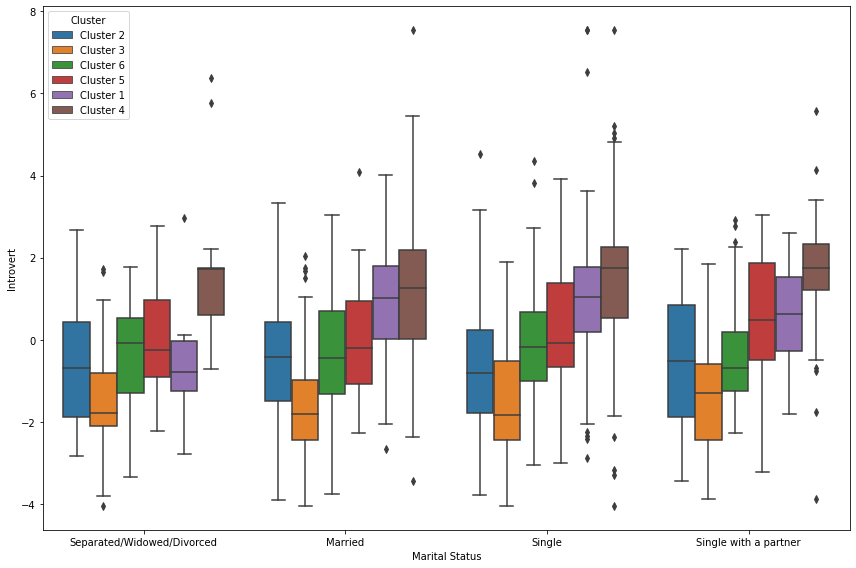

In [39]:
# Marital Status

# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Marital Status',
            y = 'Introvert',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

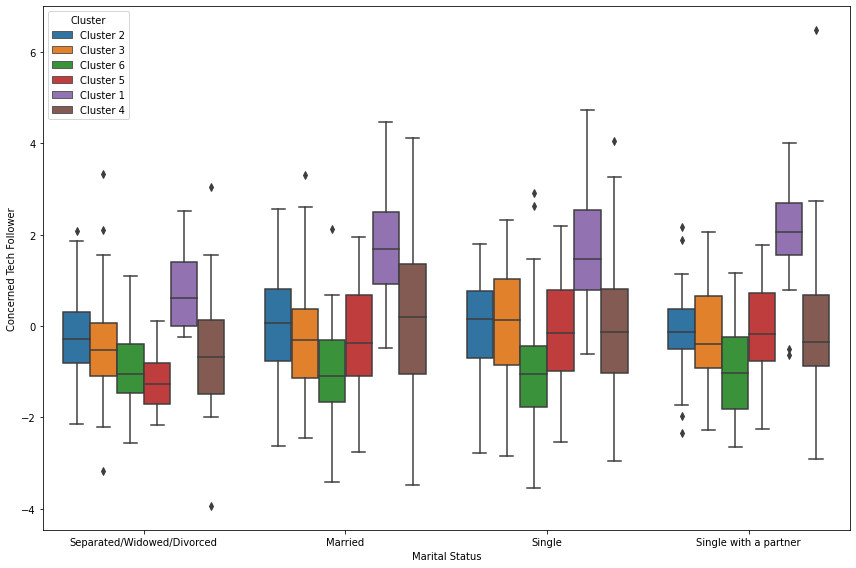

In [38]:
# Marital Status

# Concerned Tech Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Marital Status',
            y = 'Concerned Tech Follower',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

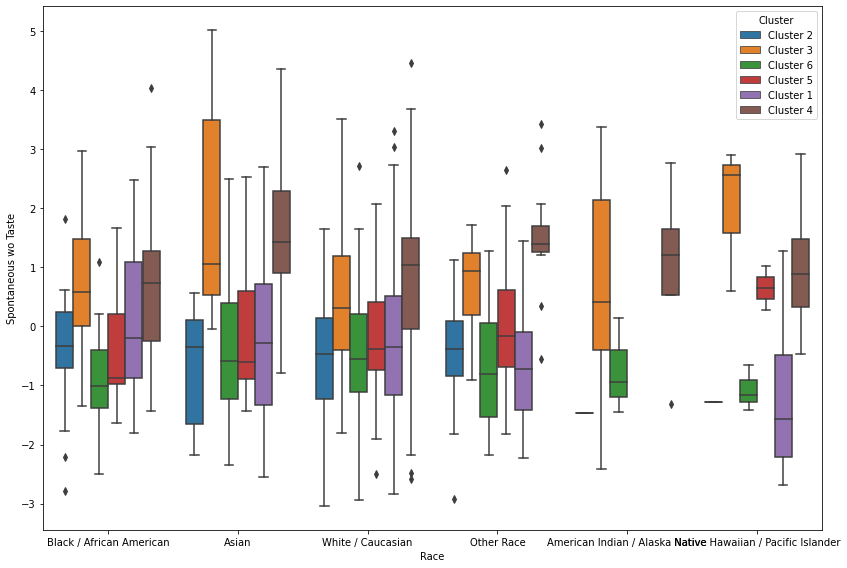

In [37]:
# Race

# Spontaneous wo Taste
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Race',
            y = 'Spontaneous wo Taste',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

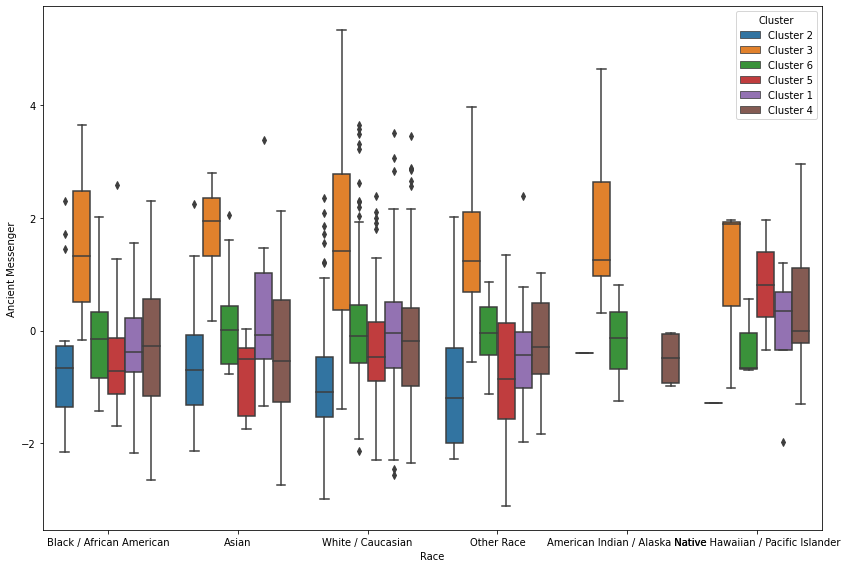

In [36]:
# Race

# Ancient Messenger
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Race',
            y = 'Ancient Messenger',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

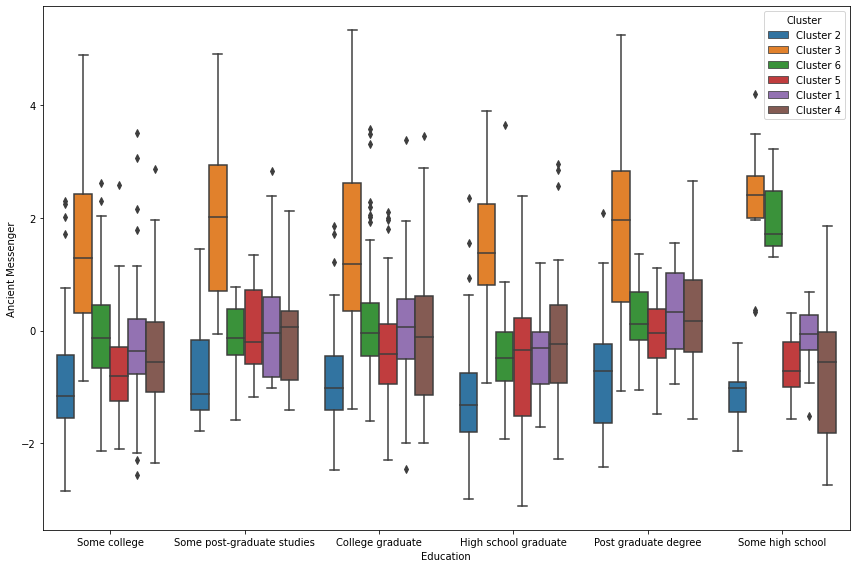

In [32]:
# Education

# Ancient Messenger
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Ancient Messenger',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

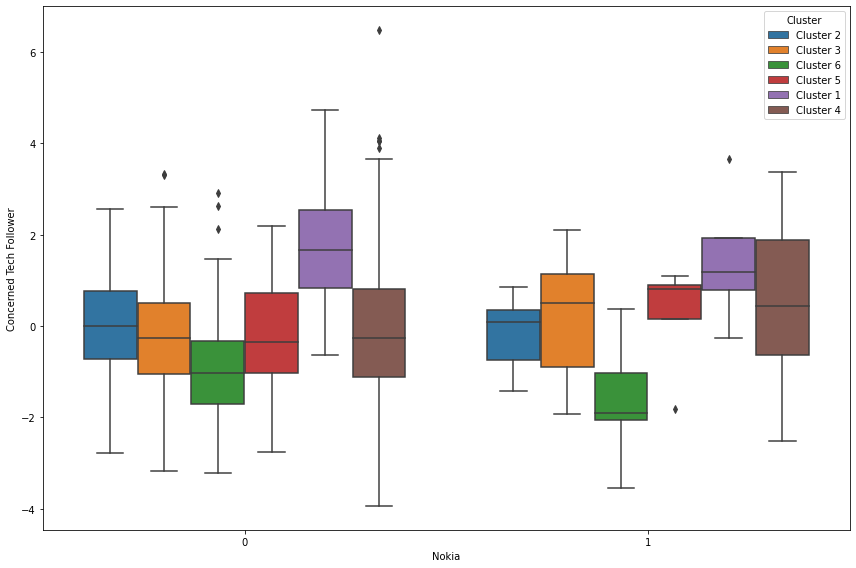

In [82]:
# Nokia

# Concerned Tech Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nokia',
            y = 'Concerned Tech Follower',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

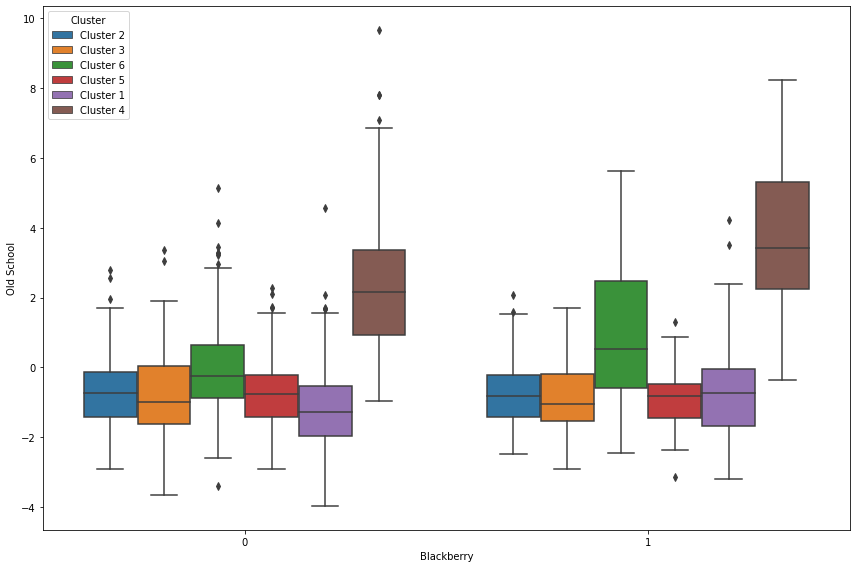

In [72]:
# Blackberry

# Old School
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Blackberry',
            y = 'Old School',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

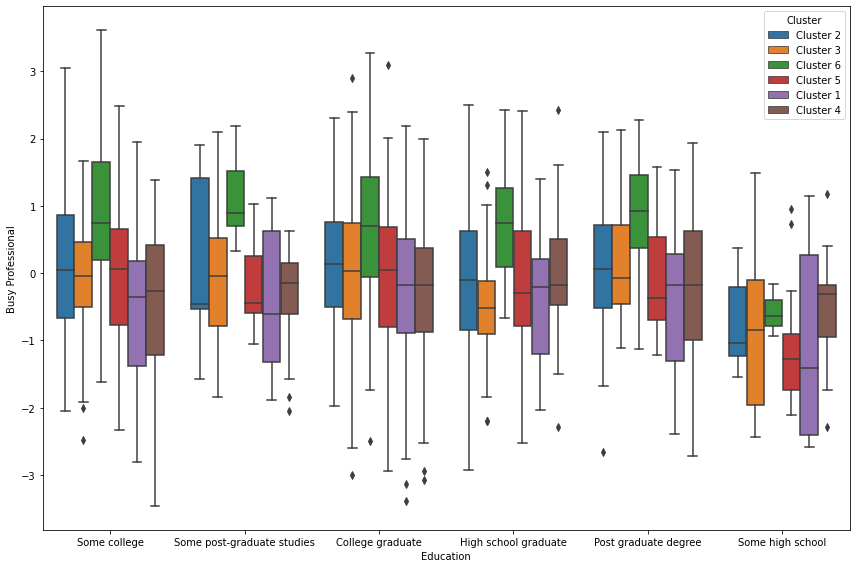

In [31]:
# Education

# Busy Professional
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Busy Professional',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

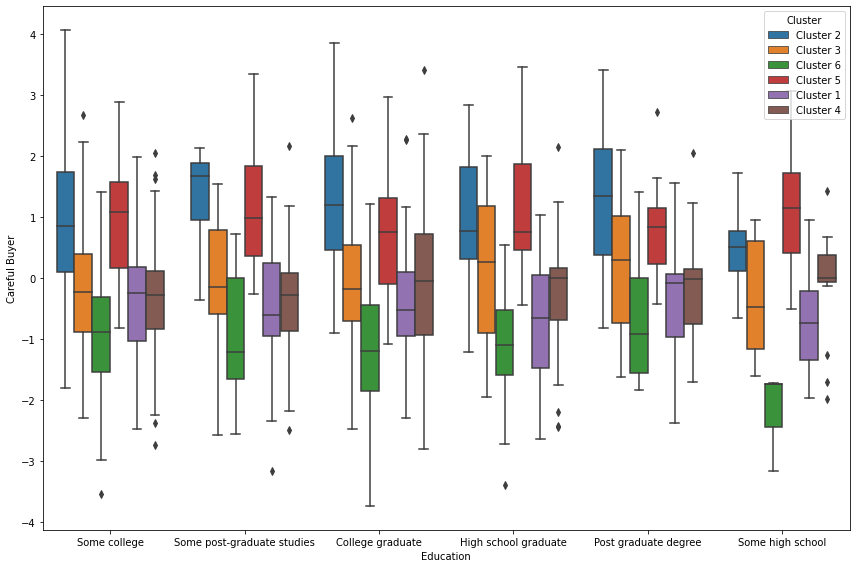

In [33]:
# Education

# Careful Buyer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Careful Buyer',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

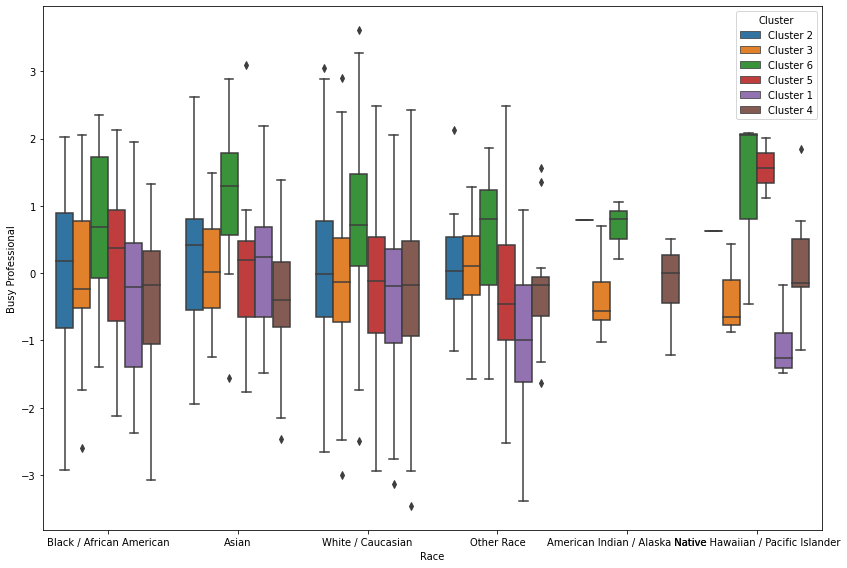

In [34]:
# Race

# Busy Professional
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Race',
            y = 'Busy Professional',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

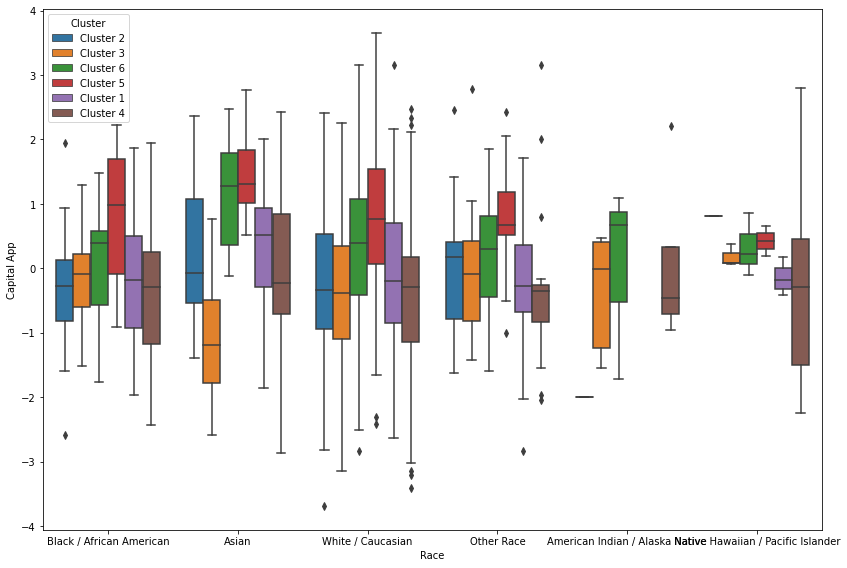

In [35]:
# Race

# Capital App
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Race',
            y = 'Capital App',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

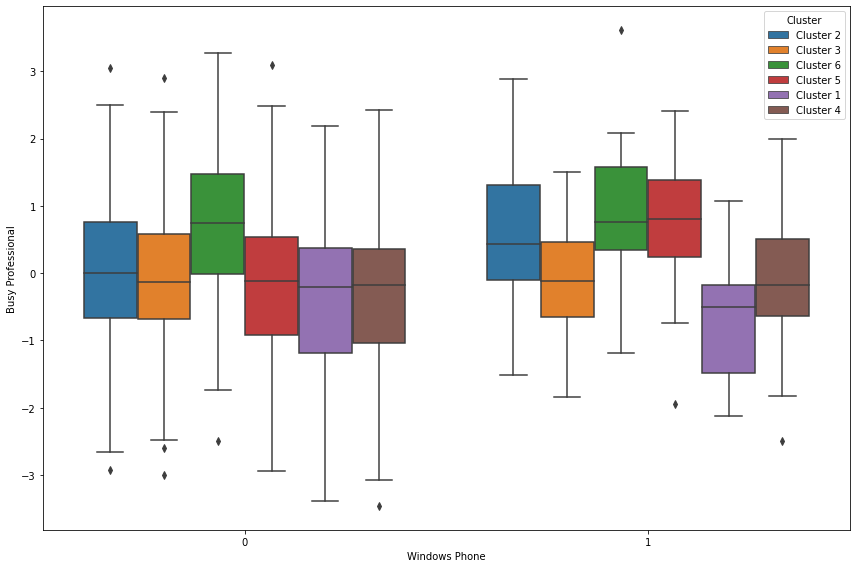

In [98]:
# Windows Phone

# Busy Professional
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Windows Phone',
            y = 'Busy Professional',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

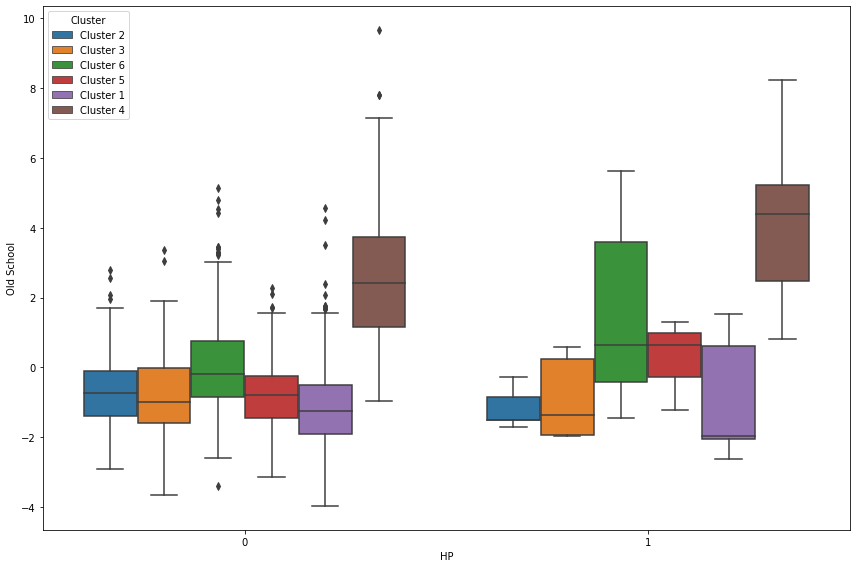

In [100]:
# HP

# Old School
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'HP',
            y = 'Old School',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

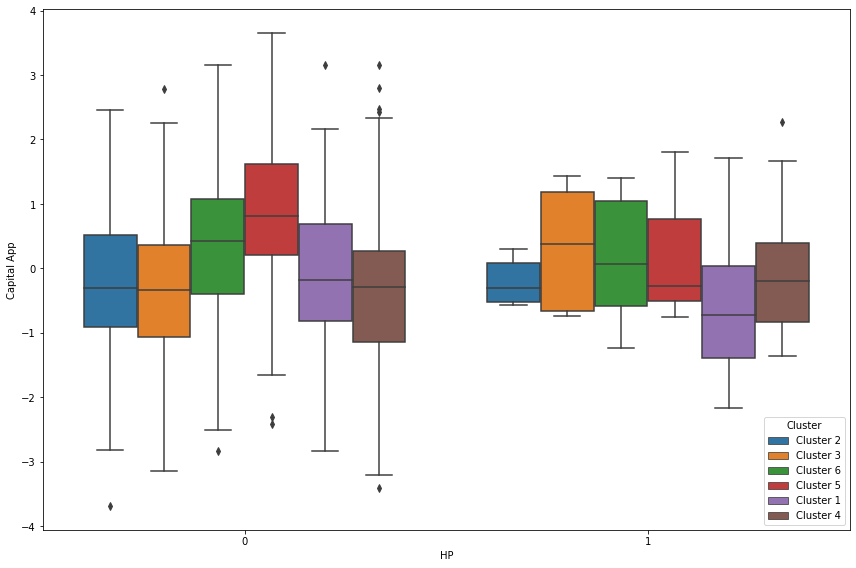

In [107]:
# HP

# Old School
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'HP',
            y = 'Capital App',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()